In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt



In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
admission_data_full= pd.read_csv('Admission_data.csv')

In [0]:
admission_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [0]:
admission_data=admission_data_full.drop('Serial No.',axis=1)
admission_data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


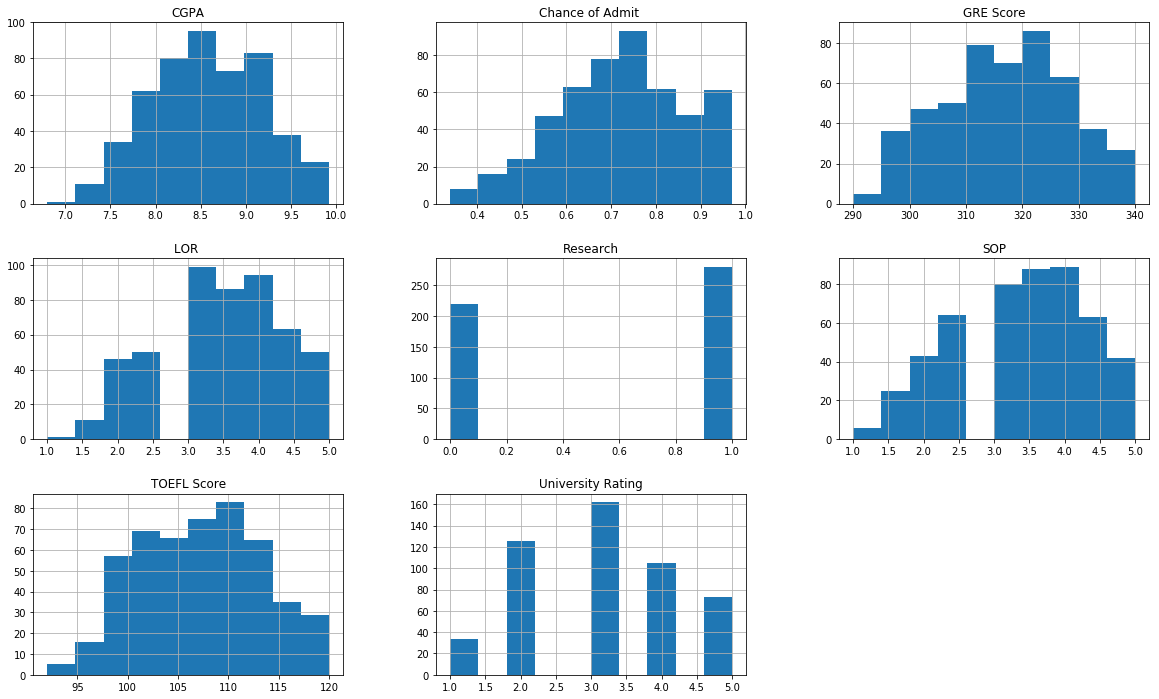

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

admission_data.hist(bins=10,figsize=(20,12))
plt.show()

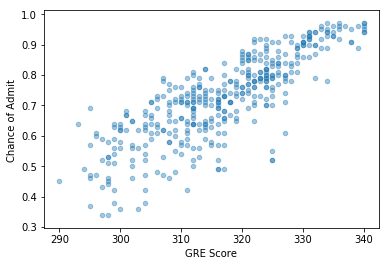

In [0]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(admission_data,test_size=0.2,random_state=42)

train_set.plot(kind='scatter',x='GRE Score',y='Chance of Admit ',alpha=0.4,)

In [0]:
train_set = train_set.astype(float)
test_set= test_set.astype(float)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 249 to 102
Data columns (total 8 columns):
GRE Score            400 non-null float64
TOEFL Score          400 non-null float64
University Rating    400 non-null float64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null float64
Chance of Admit      400 non-null float64
dtypes: float64(8)
memory usage: 28.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015793560B38>,
      dtype=object)

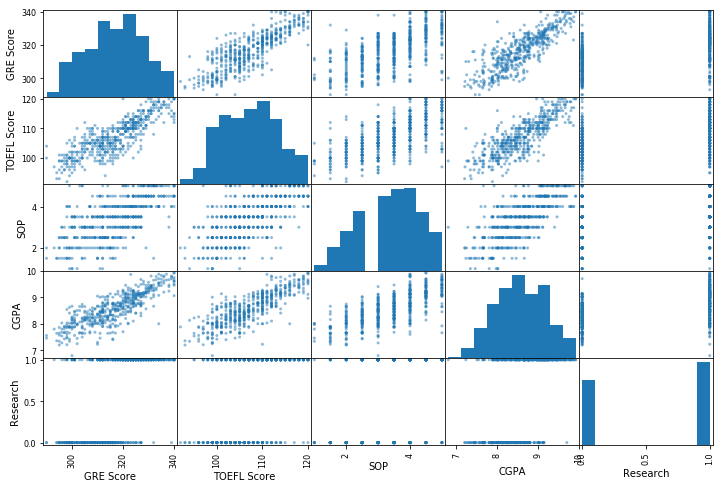

In [0]:
from pandas.plotting import scatter_matrix
attributes = ['GRE Score','TOEFL Score','SOP','CGPA','Research']

scatter_matrix(admission_data[attributes],figsize=(12,8))

##### Preparing the data for the algorithms

In [0]:
train_labels=train_set['Chance of Admit '].copy()
train_xunt=train_set.drop('Chance of Admit ',axis=1)
test_labels=test_set['Chance of Admit '].copy()
test_xunt=test_set.drop('Chance of Admit ',axis=1)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaler1.fit(train_xunt)
train_x=scaler1.transform(train_xunt)
scaler2 = MinMaxScaler()
scaler2.fit(test_xunt)
test_x=scaler1.transform(test_xunt)

##### Linear regression approach

In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() 
lin_reg.fit(train_x,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
train_predicted_values=lin_reg.predict(train_x)

(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 <a list of 9 Text yticklabel objects>)

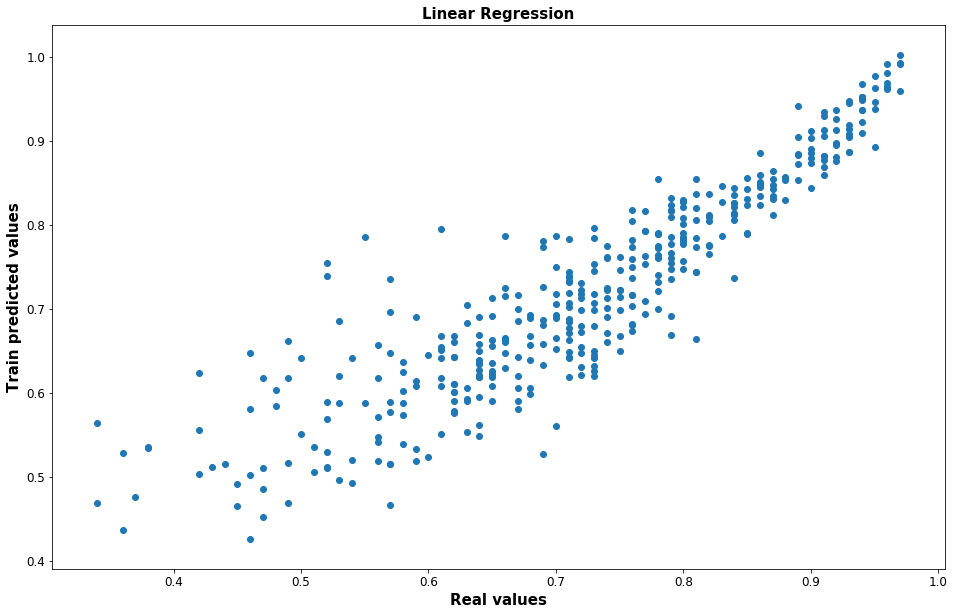

In [0]:
plt.figure(figsize=(16,10))
plt.scatter(train_labels,train_predicted_values)
plt.ylabel('Train predicted values',fontweight='bold',  fontsize='15', horizontalalignment='center')
plt.xlabel('Real values',fontweight='bold',  fontsize='15', horizontalalignment='center')
plt.title('Linear Regression',fontweight='bold',  fontsize='15', horizontalalignment='center')
plt.xticks( fontsize='12')
plt.yticks(fontsize='12')


In [0]:
test_predicted_values=lin_reg.predict(test_x)

(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 <a list of 8 Text yticklabel objects>)

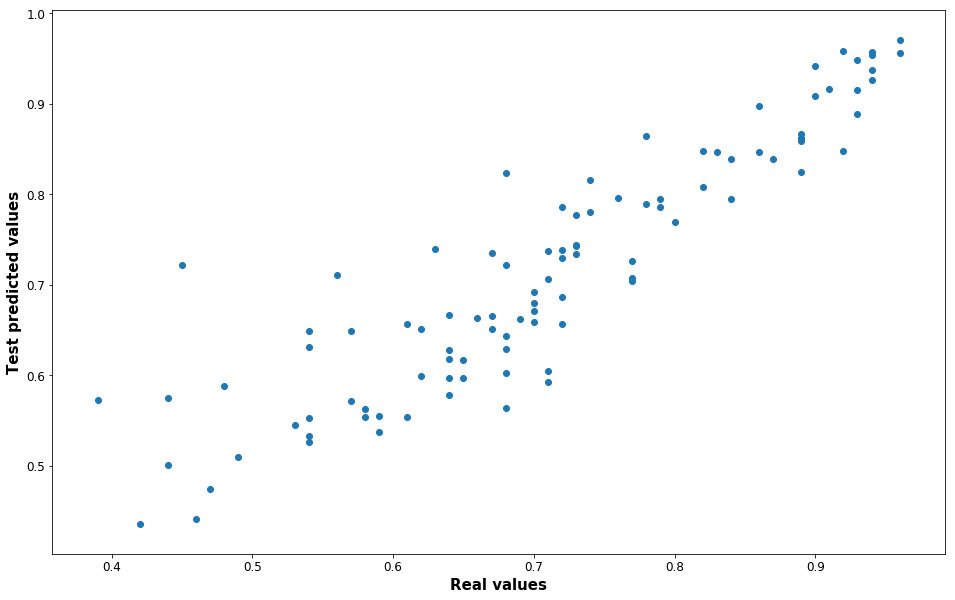

In [0]:
plt.figure(figsize=(16,10))
plt.scatter(test_labels,test_predicted_values)
plt.ylabel('Test predicted values',fontweight='bold',  fontsize='15', horizontalalignment='center')
plt.xlabel('Real values',fontweight='bold',  fontsize='15', horizontalalignment='center')
plt.xticks( fontsize='12')
plt.yticks(fontsize='12')


In [0]:
train_labels_array=np.array(train_labels)
test_labels_array=np.array(test_labels)
y_error_train=train_labels_array-train_predicted_values
y_error_test=test_labels_array-test_predicted_values

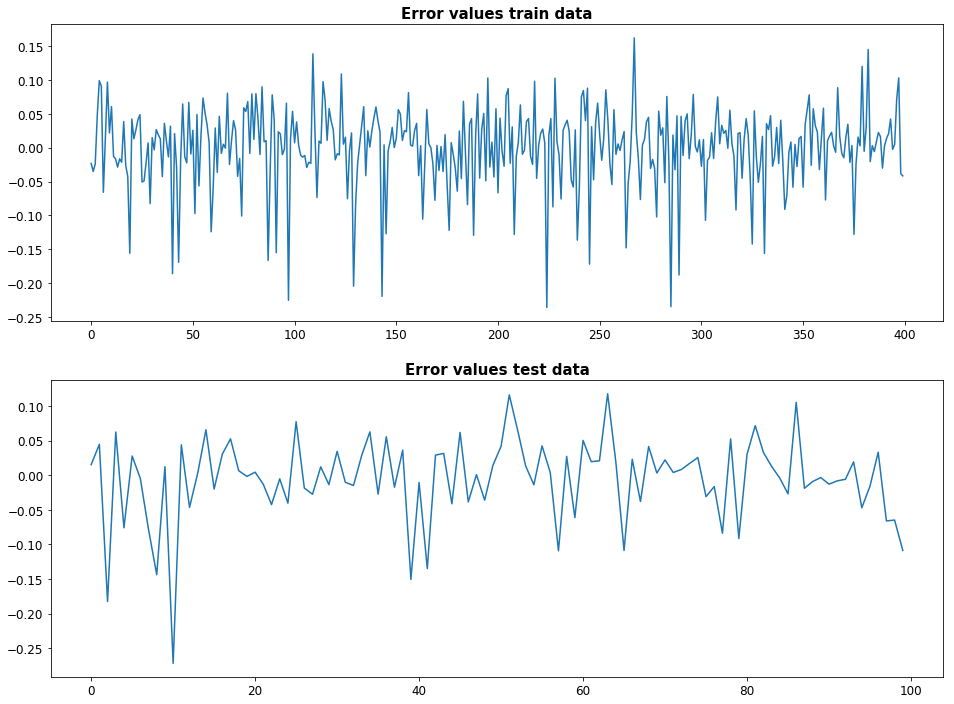

In [0]:
plt.figure(1,figsize=(16,12))
plt.subplot(2,1,1)
plt.title('Error values train data',fontweight='bold',  fontsize='15', horizontalalignment='center')
plt.xticks( fontsize='12')
plt.yticks(fontsize='12')
plt.plot(y_error_train)
plt.subplot(2,1,2)
plt.title('Error values test data',fontweight='bold',  fontsize='15', horizontalalignment='center')
plt.xticks( fontsize='12')
plt.yticks(fontsize='12')
plt.plot(y_error_test)

In [0]:
#We can determine the mean squared error of our approach
from sklearn.metrics import mean_squared_error
mse_total=mean_squared_error(test_labels,test_predicted_values)
print('Mean squared error per data point = ' + str (mse_total))

Mean squared error per data point = 0.003704655398788408


### Let's try to test a Random forest Regressor and determine whether it works better than linear regression

In [0]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(train_x,train_labels)
forest_train_predicted_values=forest_reg.predict(train_x)

C:\Users\joan.fernandez\AppData\Local\Continuum\anaconda3\envs\Neural_networks\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 <a list of 9 Text yticklabel objects>)

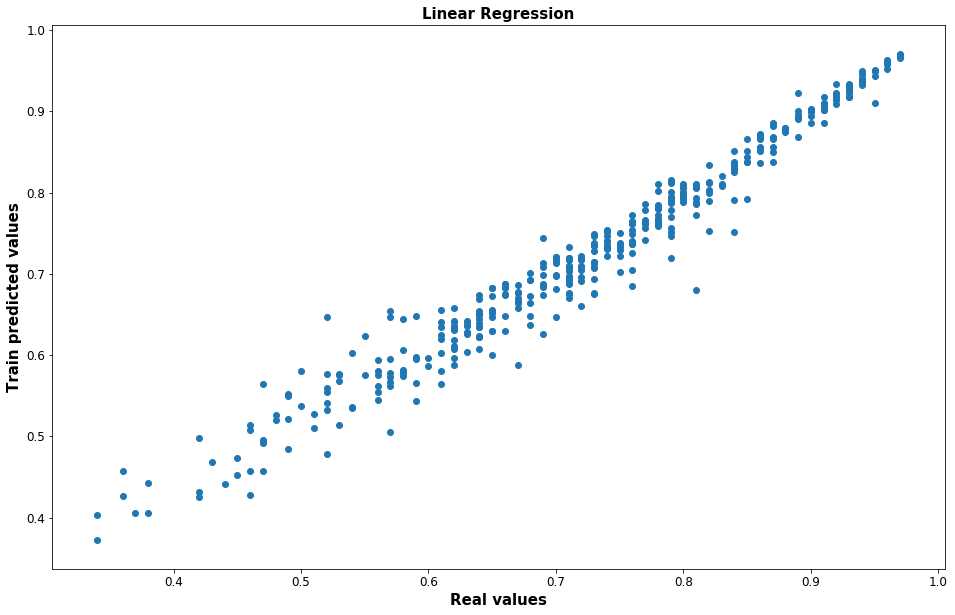

In [0]:
plt.figure(figsize=(16,10))
plt.scatter(train_labels,forest_train_predicted_values)
plt.ylabel('Train predicted values',fontweight='bold',  fontsize='15', horizontalalignment='center')
plt.xlabel('Real values',fontweight='bold',  fontsize='15', horizontalalignment='center')
plt.title('Linear Regression',fontweight='bold',  fontsize='15', horizontalalignment='center')
plt.xticks( fontsize='12')
plt.yticks(fontsize='12')